In [1]:
import numpy as np
import random
import os
import cv2 as cv
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Rescaling, AveragePooling2D, Dropout, Input , BatchNormalization
from keras.regularizers import l2

In [2]:
images = []
labels = []
classes = 43

train_path = train_path = r'.\datasets\GTSRB_dataset\Train'
testing_path = r'.\datasets\GTSRB_dataset\Test'

for i in range(classes):
    path = os.path.join(train_path, str(str(i)))
    img_folder = os.listdir(path)
    for j in img_folder:
        try:
           image = cv.imread(os.path.join(path, j))
           image = cv.resize(image, (28,28))
           image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
           image = np.array(image)
           images.append(image)
           label = np.zeros(classes)
           label[i] = 1.0
           labels.append(label)
        except:
            pass


In [3]:
images = np.array(images)
images = images/255
labels = np.array(labels)
print('Images shape:', images.shape)
print('Labels shape:', labels.shape)

Images shape: (39209, 28, 28, 3)
Labels shape: (39209, 43)


In [4]:
X = images.astype(np.float32)
y = labels.astype(np.float32)
# Random state ensures that the splits that you generate are reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (31367, 28, 28, 3)
y_train shape: (31367, 43)
X_test shape: (7842, 28, 28, 3)
y_test shape: (7842, 43)


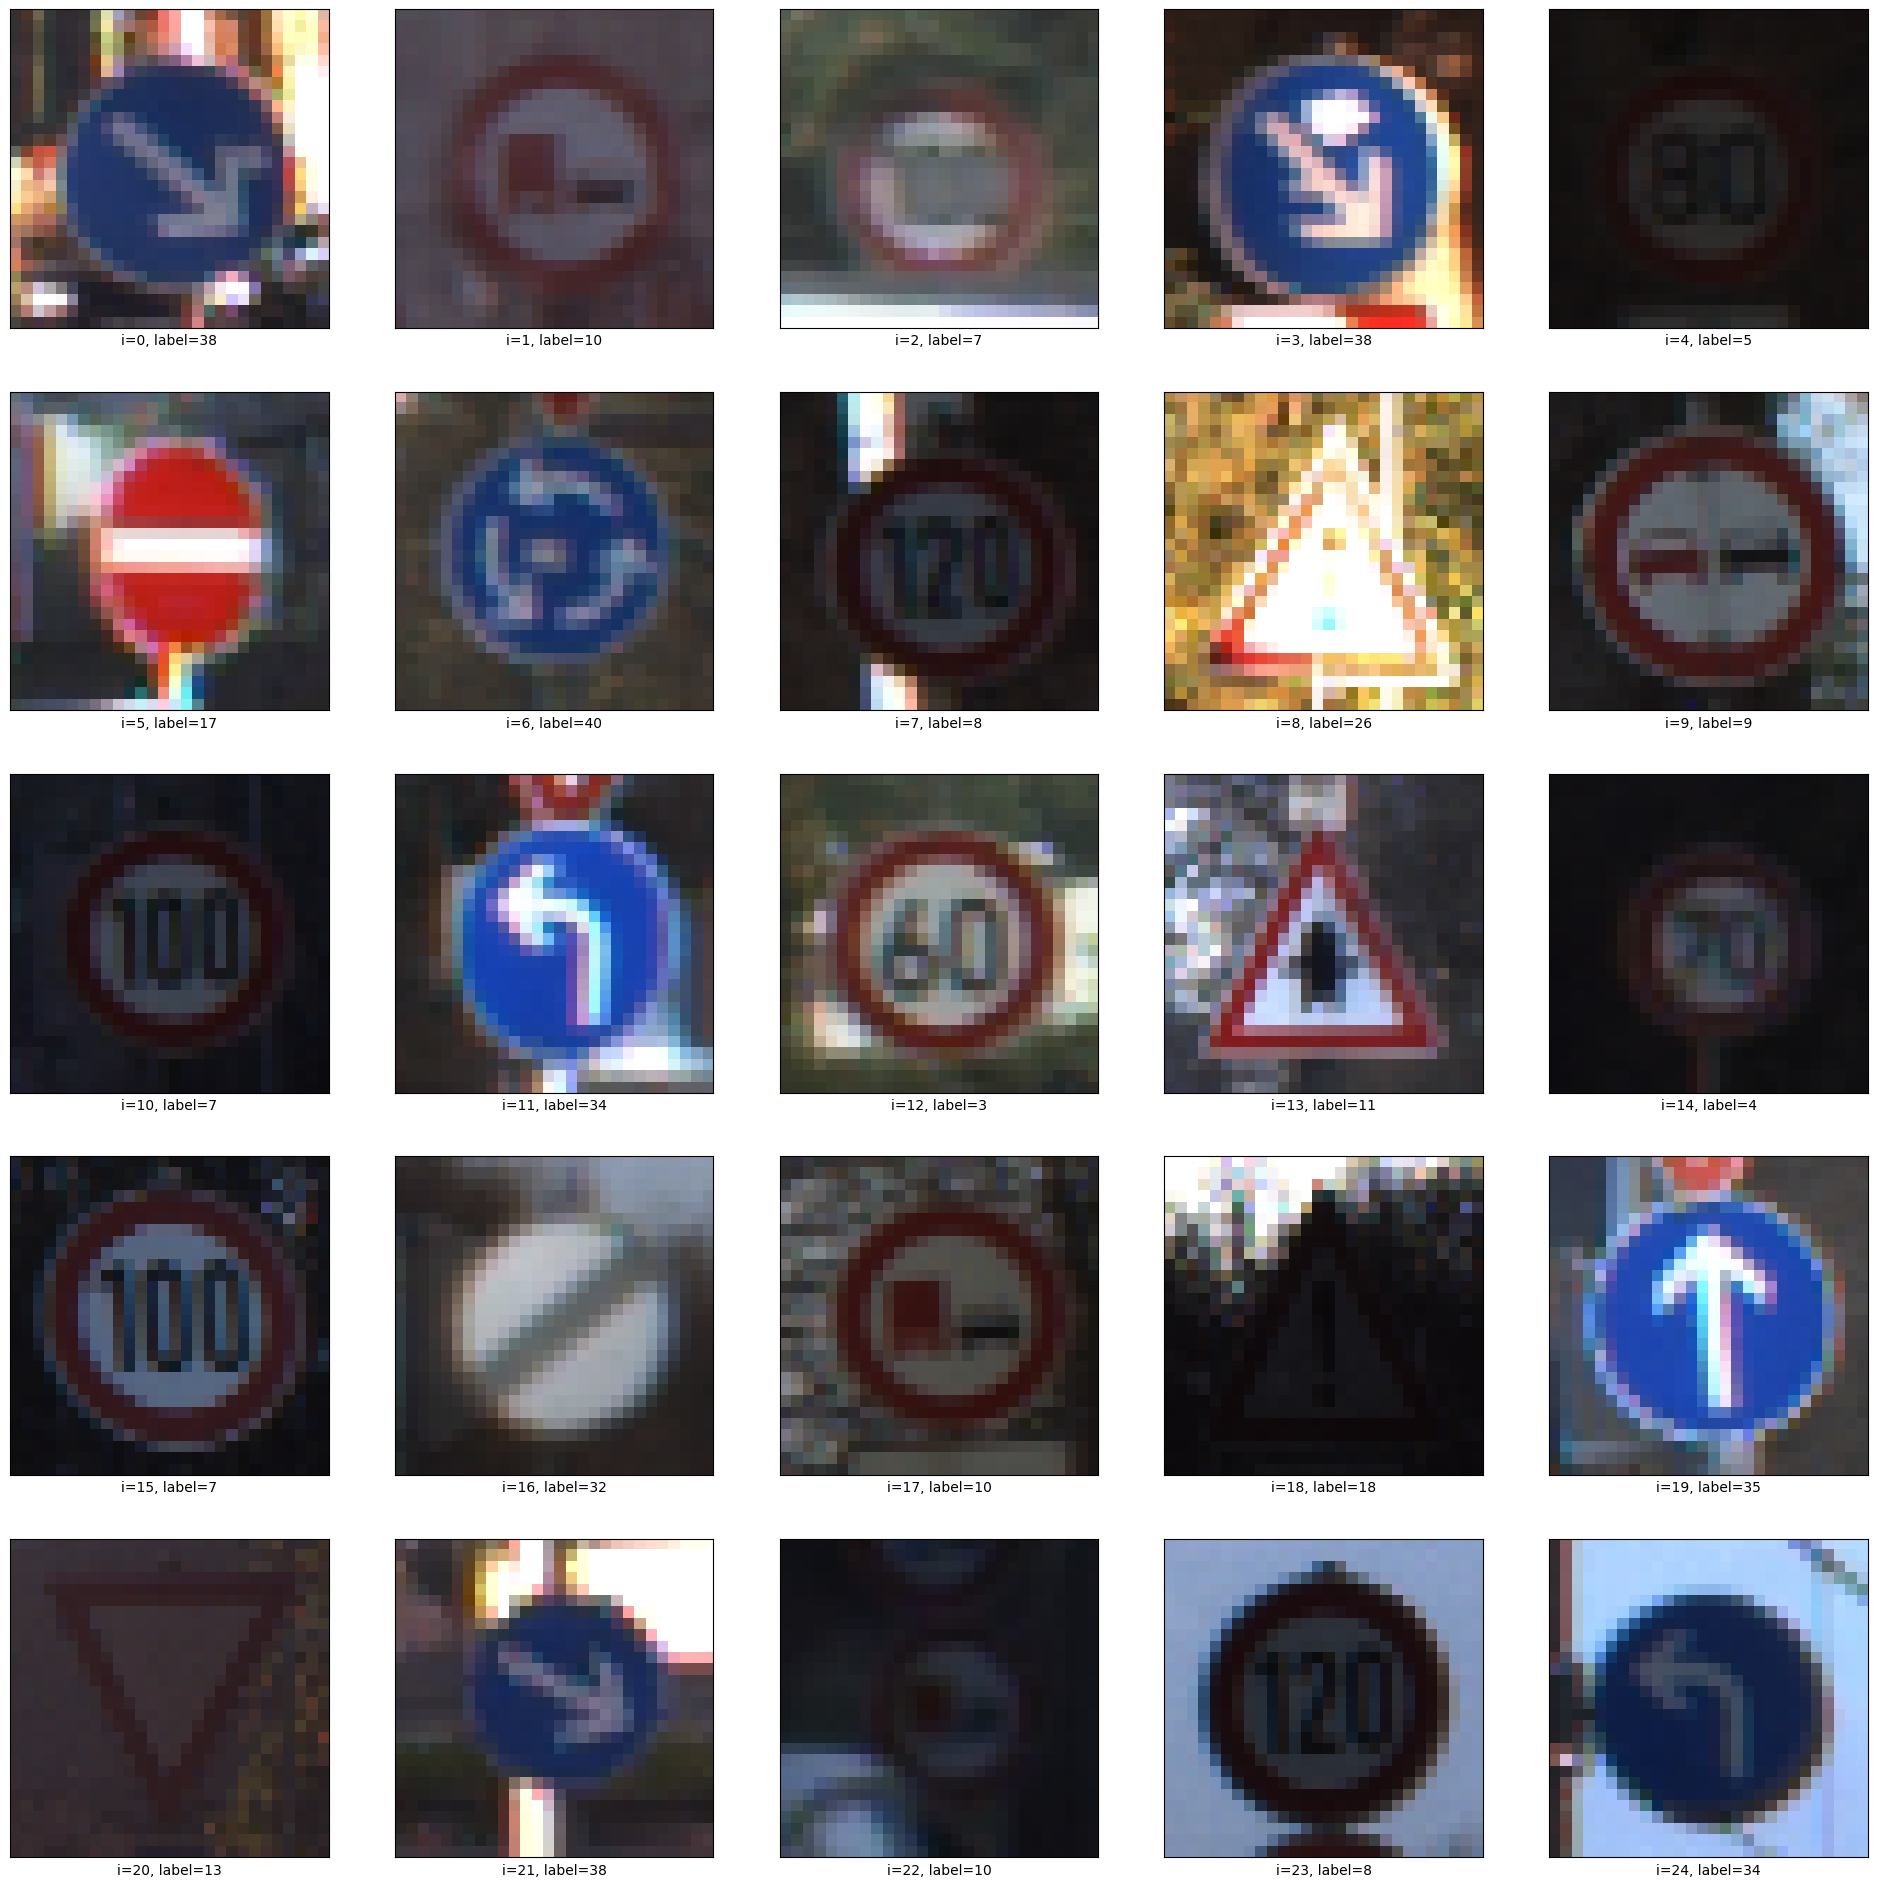

In [5]:
plt.figure(figsize=(24, 24))
start_index = 0
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    label = np.argmax(y_train[start_index+i])
    
    plt.xlabel('i={}, label={}'.format(start_index+i, label))
    plt.imshow(X_train[start_index+i])
plt.show()
     

In [6]:
model = Sequential([
    Input(shape=(28, 28, 3)),  
    #Rescaling(1.0),
    Conv2D(filters=4, kernel_size=(24, 24), activation='sigmoid'), #strides=(2,2), padding='same'),
    MaxPooling2D(pool_size=(2, 2)), #strides=(2, 2)),
    Conv2D(filters=4, kernel_size=(5, 5), activation='sigmoid'), #padding='valid'),
    MaxPooling2D(pool_size=(2, 2)), #strides=(2, 2)),
    #Conv2D(filters=120, kernel_size=(5, 5), activation='relu'),
    #Dropout(0.2),
    Flatten(),
   # Dense(units=120),#, activation='relu', kernel_regularizer=l2(0.001)),  # Added L2 regularization
   # Dense(units=84),#, activation='relu', kernel_regularizer=l2(0.001)),  # Added L2 regularization
    Dense(units=43, activation='softmax')#, kernel_regularizer=l2(0.001))  # Added L2 regularization
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', #is the default loss function for multiclass classification
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 14, 14, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 7, 7, 6)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 3, 3, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 1, 1, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │           2,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 43)                  │           3,655 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,731 (73.17 KB)

 Trainable params: 18,731 (73.17 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (31367, 28, 28, 3)
y_train shape: (31367, 43)
X_test shape: (7842, 28, 28, 3)
y_test shape: (7842, 43)


In [8]:
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_test, y_test))

Epoch 1/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0692 - loss: 3.4673 - val_accuracy: 0.1070 - val_loss: 3.1922
Epoch 2/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1474 - loss: 2.9851 - val_accuracy: 0.2419 - val_loss: 2.5987
Epoch 3/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2657 - loss: 2.4604 - val_accuracy: 0.3304 - val_loss: 2.1867
Epoch 4/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3482 - loss: 2.0784 - val_accuracy: 0.3794 - val_loss: 1.9766
Epoch 5/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4119 - loss: 1.8504 - val_accuracy: 0.4356 - val_loss: 1.7716
Epoch 6/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4515 - loss: 1.6882 - val_accuracy: 0.4950 - val_loss: 1.5774
Epoch 7/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5095 - loss: 1.5197 - val_accuracy: 0.5381 - val_loss: 1.4271
Epoch 8/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5354 - loss: 1.4144 - val_accuracy: 0.

In [9]:
val_loss, val_acc = model.evaluate(X_train, y_train, verbose=2)
print('\nValifdation accuracy:', val_acc)
print('\nValidation loss:', val_loss)

981/981 - 1s - 782us/step - accuracy: 0.8802 - loss: 0.3715

Valifdation accuracy: 0.8802244663238525

Validation loss: 0.3714786469936371


In [24]:
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nValifdation accuracy:', val_acc)
print('\nValidation loss:', val_loss)

246/246 - 1s - 3ms/step - accuracy: 0.9968 - loss: 0.1053

Valifdation accuracy: 0.9968120455741882

Validation loss: 0.10532419383525848


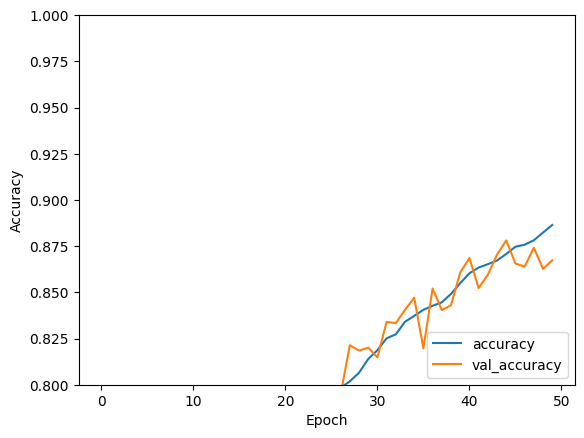

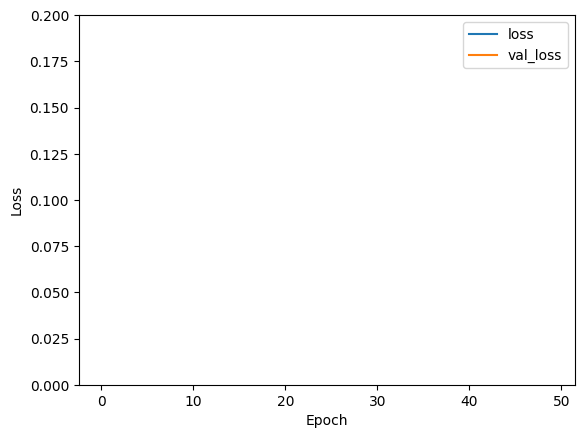

In [10]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

plt.figure(1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.2])
plt.legend(loc='upper right')

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


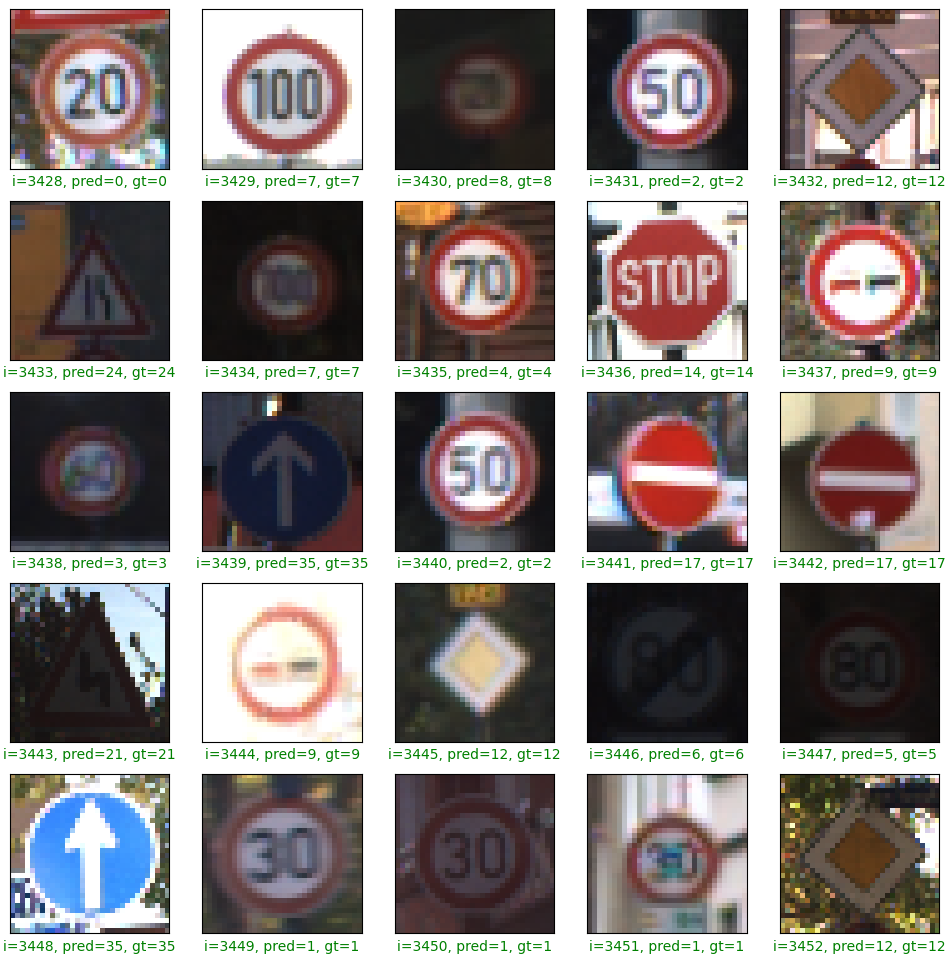

In [26]:
preds = model.predict(X_test)

plt.figure(figsize=(12, 12))
start_index = random.randint(0, 7800)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index+i])
    gt = np.argmax(y_test[start_index+i])
    
    col = 'g'
    if pred != gt:
        col = 'r'
    
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i, pred, gt), color=col)
    plt.imshow(X_test[start_index+i], cmap='gray')
plt.show()

395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


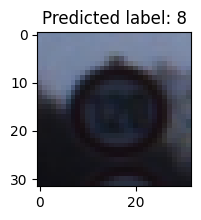

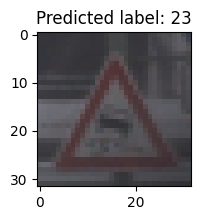

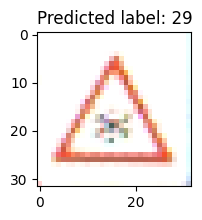

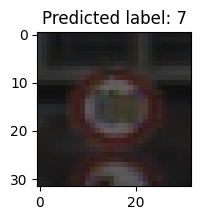

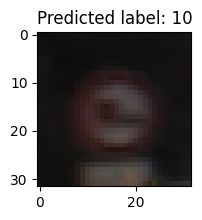

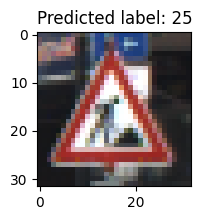

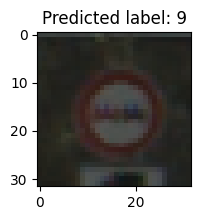

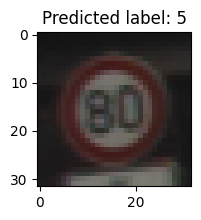

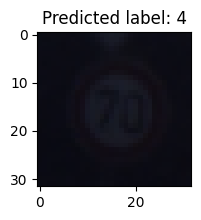

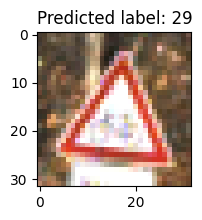

In [13]:
import random

test_images = []
test_path = r'.\datasets\GTSRB_dataset\Test'

for img_file in os.listdir(test_path):
    try:
        img = cv.imread(os.path.join(test_path, img_file))
        img = cv.resize(img, (28, 28))
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img = np.array(img) / 255.0 
        test_images.append(img)
    except:
        pass

test_images = np.array(test_images).astype(np.float32)

predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

indices = list(range(len(test_images)))
random.shuffle(indices)

for i in indices[:10]:
    plt.figure(figsize=(2, 2))  
    plt.imshow(test_images[i])
    plt.title(f'Predicted label: {predicted_classes[i]}')
    plt.show()

In [13]:
annotations_path = r'.\datasets\GTSRB_dataset\Test.csv'
annotations = pd.read_csv(annotations_path)

image_paths = annotations['Path'].values
true_class_ids = annotations['ClassId'].values

In [14]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

base_image_path = r'.\datasets\GTSRB_dataset'

def preprocess_image(image_relative_path):
    normalized_path = os.path.normpath(image_relative_path)
    full_path = os.path.join(base_image_path, normalized_path)
    img = load_img(full_path, target_size=(28, 28))  
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  
    return img

preprocessed_images = np.vstack([preprocess_image(path) for path in image_paths])

In [15]:
predictions = model.predict(preprocessed_images)
predicted_class_ids = np.argmax(predictions, axis=1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step


In [37]:
accuracy = np.mean(predicted_class_ids == true_class_ids)
print(f'Test Accuracy: {accuracy * 100:.2f}%') 

Test Accuracy: 96.90%


In [62]:
directory = r'.\keras_model'
filename = 'model.keras'

# Check if the directory exists, create it if it doesn't
if not os.path.exists(directory):
    os.makedirs(directory)

# Full path for saving the model
full_path = os.path.join(directory, filename)

# Save the model
model.save(full_path)
print(f'Model saved at {full_path}')

Model saved at .\keras_model\model.keras
